#Begin

##Purpose:

 provide an analysis that identifies what traits can be used to indicate a higher probability of a positive/ideal outcome

In [142]:
#libs import

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import datetime as dt


%matplotlib inline

In [143]:
#import dist
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [144]:
try:
    data=pd.read_excel('gdrive/My Drive/Linkedin Accounts That Purchased Memberships.xlsx')
except:
    path  = ''
    data = pd.read_excel(path + 'Linkedin Accounts That Purchased Memberships.xlsx')

In [145]:
#dataset with no changes
raw_shape = data.shape

In [146]:
data.describe()

,subscribers,userId,connectionsCount,sirenFromDropContact,siretFromDropContact,siretZipFromDropContact,Unnamed: 72
count,347.000000,2.890000e+02,50.000000,1.600000e+01,1.600000e+01,15.000000,0.0
mean,2621.417867,1.382331e+08,495.360000,6.139440e+08,6.139375e+13,57823.533333,NaN
std,4094.423593,1.767940e+08,25.251195,2.011537e+08,2.010995e+13,32000.131698,NaN
min,0.000000,1.536100e+04,332.000000,3.495308e+08,3.500000e+13,6000.000000,NaN
25%,650.500000,1.787841e+07,500.000000,4.218131e+08,4.217500e+13,31310.000000,NaN
50%,1307.000000,6.125360e+07,500.000000,5.050729e+08,5.050000e+13,69003.000000,NaN
75%,2571.000000,1.860060e+08,500.000000,8.216789e+08,8.217500e+13,81875.000000,NaN
max,32970.000000,8.182356e+08,500.000000,8.892712e+08,8.890000e+13,95130.000000,NaN


In [147]:
data.info()
print()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 74 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   linkedinProfile               348 non-null    object        
 1   Result                        348 non-null    object        
 2   Other                         191 non-null    object        
 3   email                         216 non-null    object        
 4   description                   278 non-null    object        
 5   headline                      348 non-null    object        
 6   location                      348 non-null    object        
 7   firstName                     348 non-null    object        
 8   lastName                      348 non-null    object        
 9   fullName                      348 non-null    object        
 10  subscribers                   347 non-null    float64       
 11  userId                        28

(348, 74)

In [148]:
#searching missing values
display(data.isna().sum().sort_values(ascending=True))



linkedinProfile                 0
fullName                        0
lastName                        0
firstName                       0
location                        0
                             ... 
naf5DesFromDropContact        334
nbEmployeesFromDropContact    336
mutualConnectionsText         344
mail                          345
Unnamed: 72                   348
Length: 74, dtype: int64

The main points like result and linkedinProfile have no empty also name

In [149]:
#findings duplicates
data.duplicated().sum()

0

no duplicate on dataset

In [150]:
display(data.head)

<bound method NDFrame.head of                                        linkedinProfile  \
0      https://www.linkedin.com/in/mark-kohoot-96a08b1   
1              https://www.linkedin.com/in/jonbowerman   
2             https://www.linkedin.com/in/parkeralynch   
3            https://www.linkedin.com/in/shacharschiff   
4    https://www.linkedin.com/in/gary-lacourt-811b1874   
..                                                 ...   
343        https://www.linkedin.com/in/maeganscarlett/   
344          https://www.linkedin.com/in/magic-marcus/   
345             https://www.linkedin.com/in/marcuswax/   
346  https://www.linkedin.com/in/margaret-conger-50...   
347  https://www.linkedin.com/in/matthew-d-lando-72...   

                      Result   Other                              email  \
0    5. Purchased Membership  Hunter                   mk@aeroscena.com   
1    5. Purchased Membership  Hunter                   jon@kidsdraw.org   
2    5. Purchased Membership  Hunter          Pa

In [151]:
#name columns lower
#data = data.rename(columns={'Result': 'result', 'Other': 'other','firstName': 'first_name'})
data.columns = map(str.lower, data.columns)

Seeking the main criterion 'result'

In [152]:
#main point is result lets focuse on it
data.value_counts('result')

result
2021 Member                157
2. Sent Personal f/u       127
3. Approved                 28
Out of Sequence             26
4.Purchased Event            6
5. Purchased Membership      4
dtype: int64

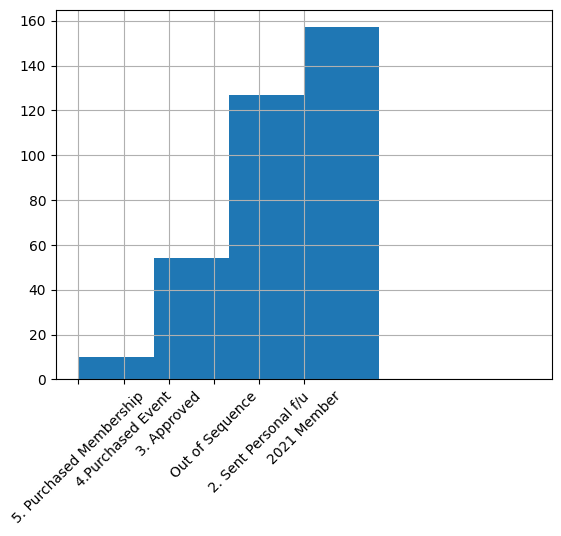

In [153]:
data['result'].hist(bins=6,range = (0,10));
plt.xticks(rotation = 45);

Only 4 positive result wtih higher result, lets check what users and patterns of em

sentpersonalf/u and 2021 member are most popular result

##positive result

In [154]:
positive_result = data.query('result=="5. Purchased Membership" or result=="4.Purchased Event"')
print(positive_result)


                                     linkedinprofile                   result  \
0    https://www.linkedin.com/in/mark-kohoot-96a08b1  5. Purchased Membership   
1            https://www.linkedin.com/in/jonbowerman  5. Purchased Membership   
2           https://www.linkedin.com/in/parkeralynch  5. Purchased Membership   
3          https://www.linkedin.com/in/shacharschiff  5. Purchased Membership   
4  https://www.linkedin.com/in/gary-lacourt-811b1874        4.Purchased Event   
5  https://www.linkedin.com/in/lyle-stoflet-38a07ab8        4.Purchased Event   
6          https://www.linkedin.com/in/whiteandrewdc        4.Purchased Event   
7           https://www.linkedin.com/in/donniemcfall        4.Purchased Event   
8                https://www.linkedin.com/in/sykraft        4.Purchased Event   
9      https://www.linkedin.com/in/alan-dahl-2a6781b        4.Purchased Event   

    other                              email  \
0  Hunter                   mk@aeroscena.com   
1  Hunter   

How subscribers affect on reason

                         subscribers
result                              
2. Sent Personal f/u     2825.732283
2021 Member              2621.121795
3. Approved              2931.964286
4.Purchased Event        2892.166667
5. Purchased Membership  1923.500000
Out of Sequence          1335.653846


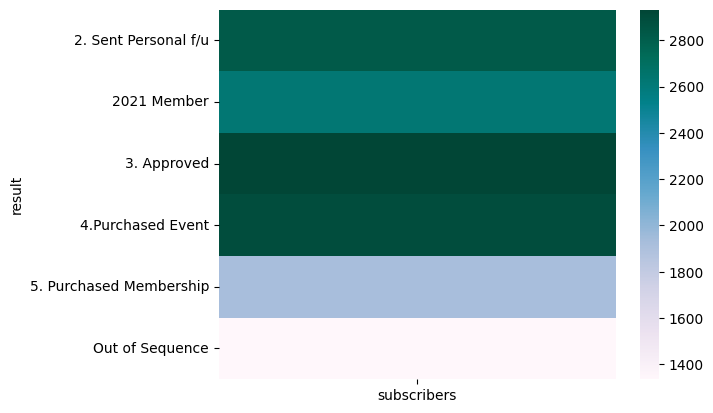

In [167]:
sub_index = data.pivot_table(index =['result'], values='subscribers')

seaborn.heatmap(data = sub_index,cmap='PuBuGn')

print(sub_index)


There is no such dependence from subscribers



In [156]:
#check date of event maybe its sale or etc.
data['purchase_date'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d')
data['purchase_month']  = data['purchase_date'].dt.month
data['purchase_day']  = data['purchase_date'].dt.day

In [157]:
print('month count only',data['purchase_month'].nunique())
print('day count only',data['purchase_day'].nunique())

month count only 1
day count only 2


Only one month or day show in data, there is no way to check more

How cicivility affect  on result

In [158]:
print(data['civilityfromdropcontact'].value_counts())

Mr     214
Mrs     63
Name: civilityfromdropcontact, dtype: int64


In [159]:
by_civility = data.groupby(['civilityfromdropcontact','result'])['result'].count().sort_values()

by_civility

civilityfromdropcontact  result                 
Mr                       5. Purchased Membership     4
Mrs                      Out of Sequence             4
Mr                       4.Purchased Event           6
Mrs                      3. Approved                10
Mr                       3. Approved                17
                         Out of Sequence            18
Mrs                      2021 Member                19
                         2. Sent Personal f/u       30
Mr                       2021 Member                77
                         2. Sent Personal f/u       92
Name: result, dtype: int64

Only men show ideal results; however, there are more men than women in dataset also  no result

Check birthday ia any wrong with this column

In [160]:
birthday = data[data[['birthday']].notnull().all(1)]
birthday['birthday']

2     2023-05-15
6     2023-09-21
7     2023-06-24
8     2023-05-12
18    2023-04-09
         ...    
321   2023-04-22
324   2023-10-14
332   2023-11-21
333   2023-05-24
334   2023-04-22
Name: birthday, Length: 95, dtype: datetime64[ns]

All birthday days are 2023 year, so we cannot check age of users and we need more data to make analis

we can use  schoolDateRange if possible but it will be not correct analis

In [161]:
#lets use


present = data['jobdaterange'].str.contains('Present').sum()
all = data['jobdaterange'].count()
present = all-present
print('only',present,'people not working at now')

only 3 people not working at now


##not positive result

In [165]:
#by cicivility
sent_personal_fu = data.query('result=="2. Sent Personal f/u"')
sent_personal_fu['civilityfromdropcontact'].value_counts()

Mr     92
Mrs    30
Name: civilityfromdropcontact, dtype: int64

There are not enought  data like  birthday or etc.
Will be good to see actual birth year and more categorise school degree or timestamp when used bought event tkt.
On that moment i can only say about civility patten,that 'Mr ' use much more than 'Mrs' and only 'Mr' bougths tkt